# Project 8: Data Preprocessing & Feature Engineering for Machine Learning (Housing Dataset)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 8 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## Data Import and first Inspection

1. __Import__ the housing dataset (housing.csv) and __inspect__!

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df_raw=pd.read_csv('housing.csv')
df_raw

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


__Features__:

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df_raw.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [7]:
df_raw[df_raw.duplicated(keep=False)] #No duplicated rows 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


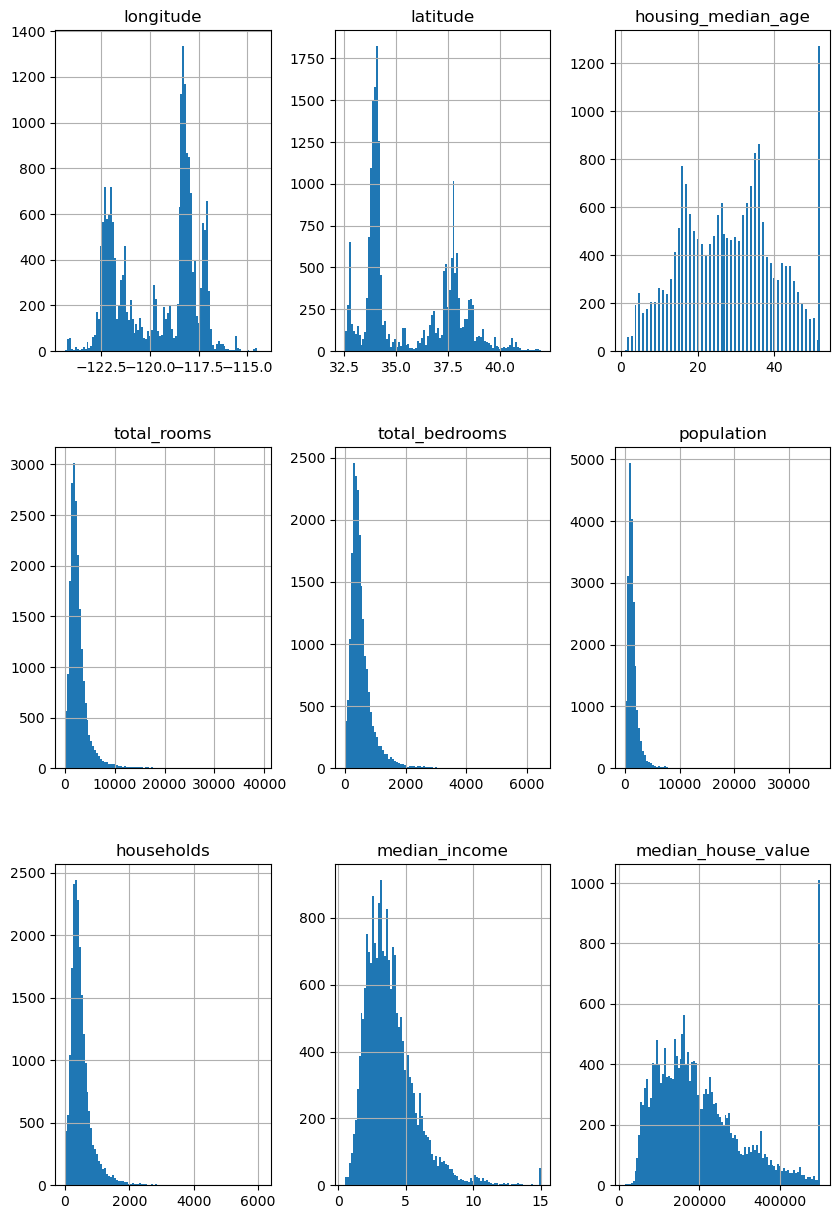

In [8]:
df_raw.hist(bins=100, figsize=(10,15))
plt.show()

## Data Cleaning and Creating additional Features

2. __Drop__ all rows with (at least one) missing value(s).

In [9]:
df=df_raw.dropna().copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


3. __Add__ the additional Feature __"rooms_per_household"__ (should be self-explanatory)

In [10]:
df['rooms_per_household']=df.total_rooms.div(df.households)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513


4. __Add__ the additional Feature __"population_per_household"__ (should be self-explanatory)

In [11]:
df['population_per_household']=df.population.div(df.households)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209


5. __Add__ the additional Feature __"bedrooms_per_household"__ (should be self-explanatory)

In [12]:
df['bedrooms_per_household']=df.total_bedrooms.div(df.households)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,1.081081
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,1.133333
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,1.315789
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,1.120092
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,1.171920


## Which Factors influence House Prices?

6. __Calculate__ the __Correlation__ between "median_house_value" and all features. Which factors seems to influence house prices/values?

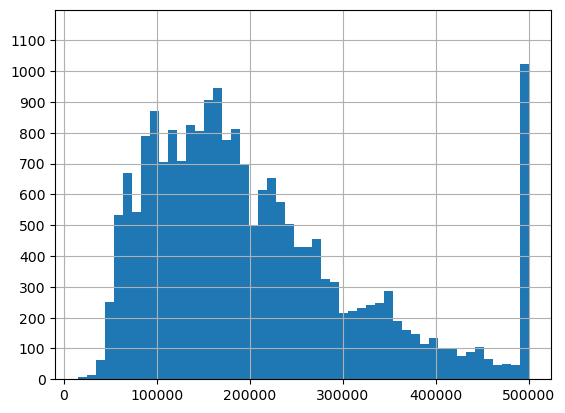

In [13]:
df.median_house_value.hist(bins=50)
plt.yticks(range(0,1200,100))
plt.ylim(0,1200)
plt.show()

In [14]:
df.corr(numeric_only=True).median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688355
rooms_per_household         0.151344
total_rooms                 0.133294
housing_median_age          0.106432
households                  0.064894
total_bedrooms              0.049686
population_per_household   -0.023639
population                 -0.025300
longitude                  -0.045398
bedrooms_per_household     -0.046739
latitude                   -0.144638
Name: median_house_value, dtype: float64

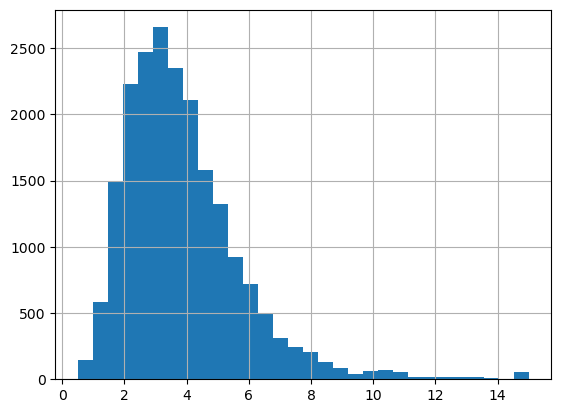

In [15]:
#Checking the feauture with more correlation to household prices
df.median_income.hist(bins=30)
#plt.yticks(range(0,300,10))
#plt.ylim(0,300)
plt.show()

7. __Create__ a Seaborn Regression plot (__jointplot__) with income on the x-axis and house value on the y-axis.

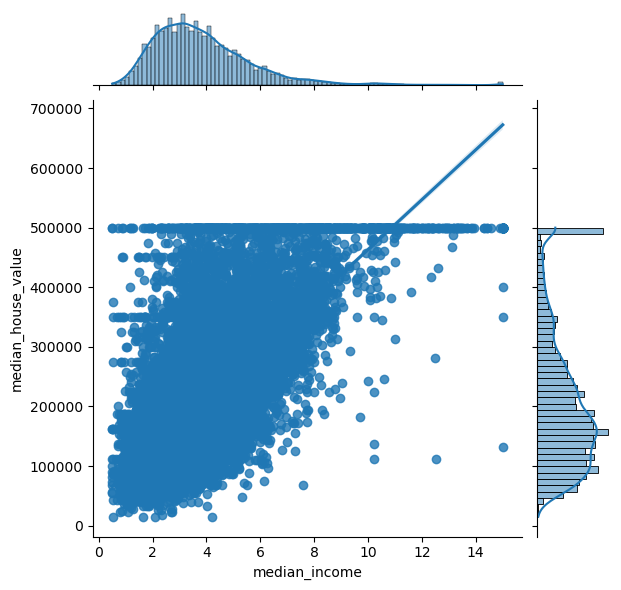

In [16]:
sns.jointplot(df,x='median_income',y='median_house_value', kind='reg')
plt.show()

## Explorar con el feature 'Ocean proximity' tratándolo como category

In [17]:
#Me di cuenta que las categorias en este orden tienen más sentido para su plot en el mapa

b=df.ocean_proximity.astype('category')
print('orden original de categorias',b.cat.categories)
b=b.cat.reorder_categories(['INLAND','<1H OCEAN','NEAR BAY','NEAR OCEAN','ISLAND'])
print('nuevo orden de categorias',b.cat.categories)

#b=b.cat.remove_categories(['INLAND','<1H OCEAN', 'NEAR BAY','NEAR OCEAN'])
#b.cat.codes

orden original de categorias Index(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype='object')
nuevo orden de categorias Index(['INLAND', '<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND'], dtype='object')


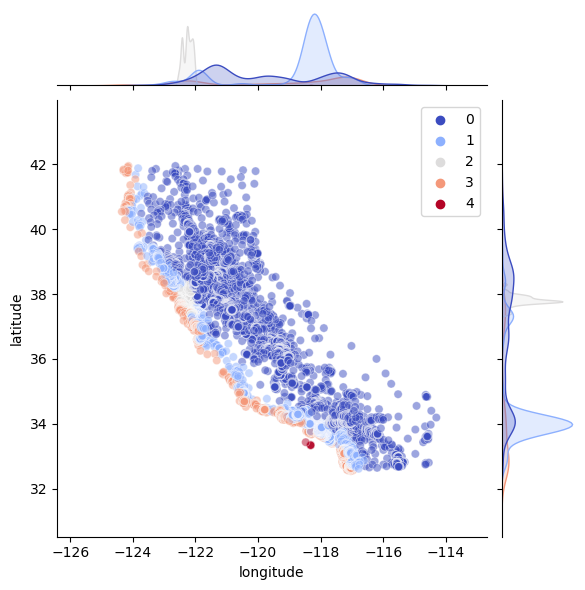

In [18]:
sns.jointplot(df,x='longitude',y='latitude', hue=b.cat.codes, palette='coolwarm',alpha=.5)
plt.show()

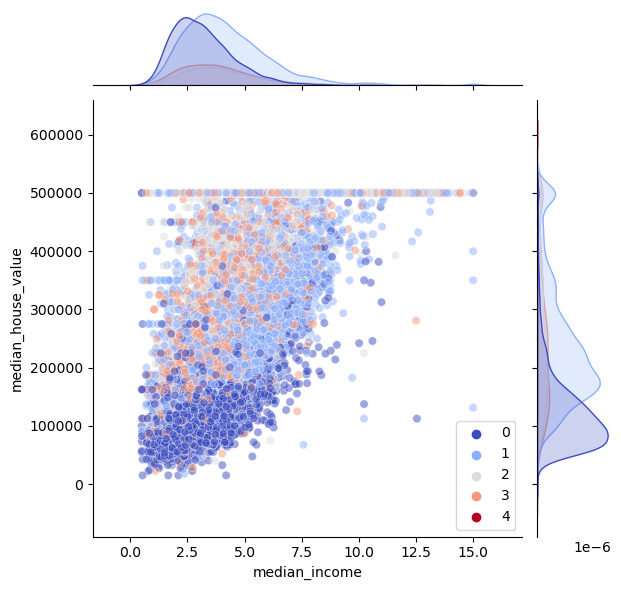

In [19]:
#This chart explains why there are some expensive houses in poor neighbors and it's because those houses are very close to the beach
sns.jointplot(df,x='median_income',y='median_house_value', hue=b.cat.codes,palette='coolwarm',alpha=.5)
plt.show()

8. __Create__ the following __scatterplot__ (df.plot(kind = "scatter")) with
- longitude on x-axis
- latitude on y-axis
- size (s) of data points determined by population
- color (c) of data points determined by median_house_value

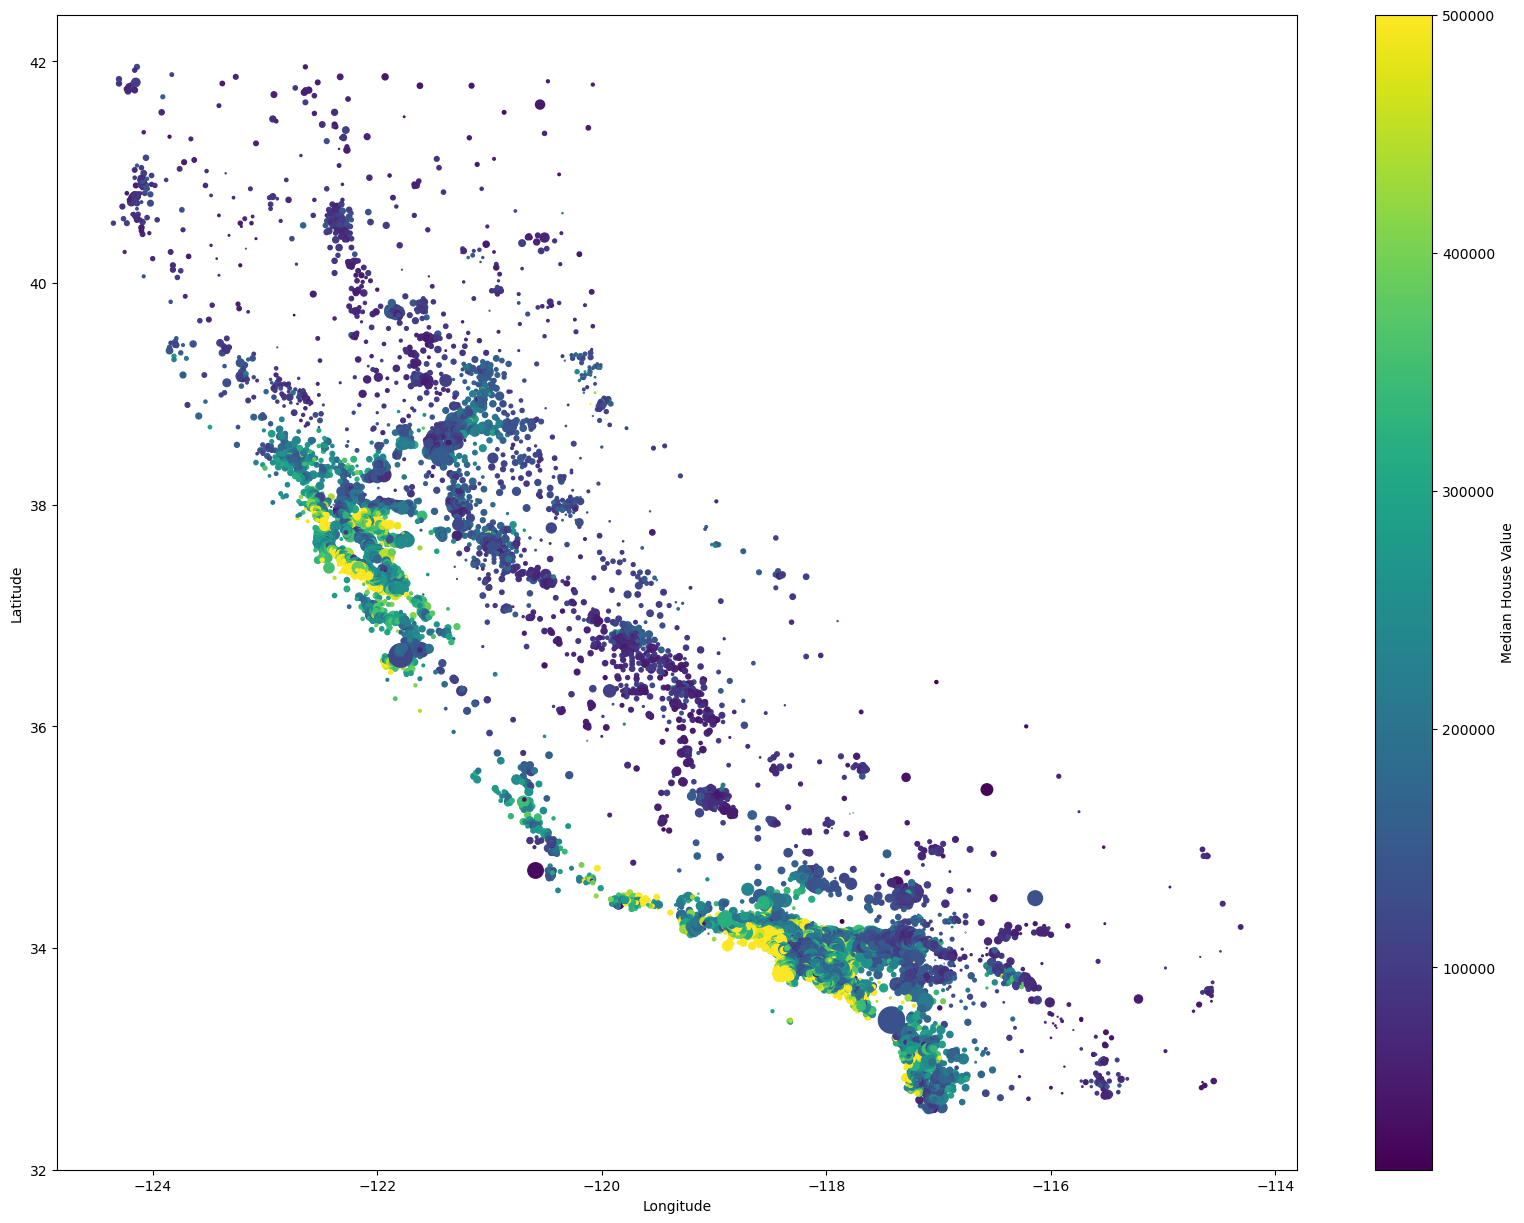

In [20]:
plt.figure(figsize=(20,15))
plt.scatter(x=df.longitude,y=df.latitude, s=df.population/100, c=df.median_house_value)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Median House Value')
plt.yticks(range(32,44,2))
plt.show()

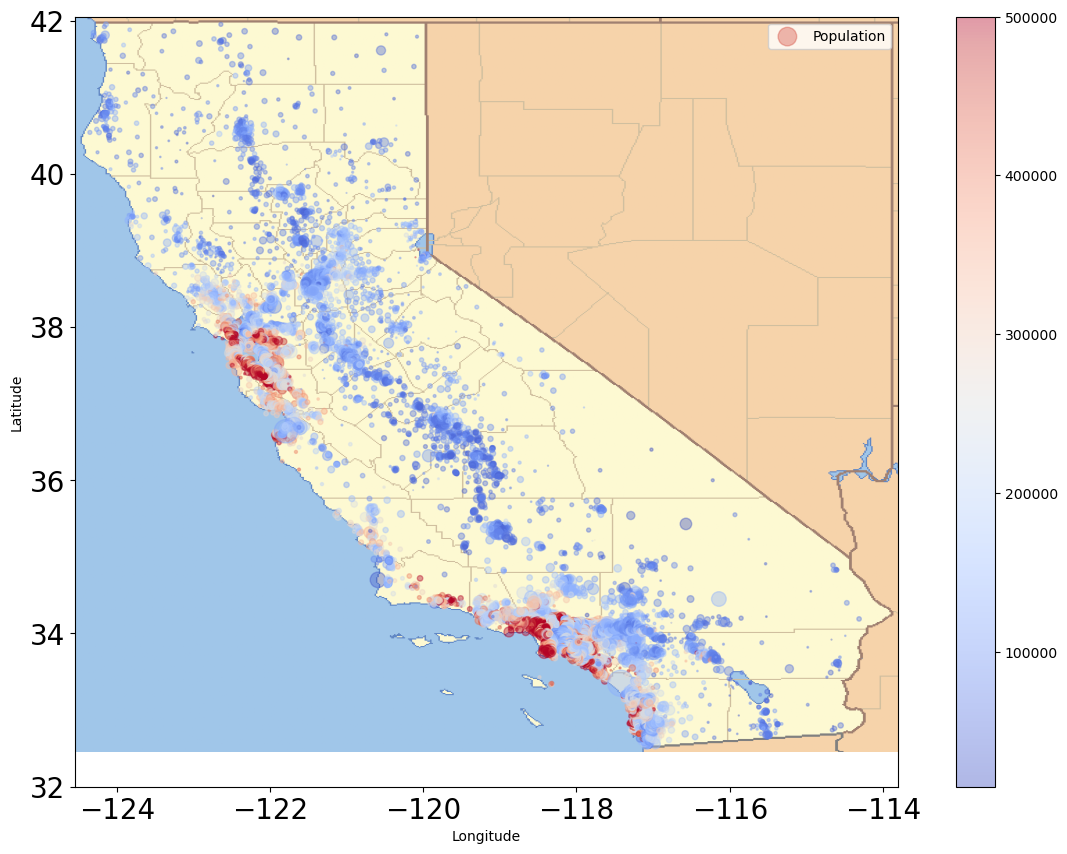

In [21]:
import matplotlib.image as mpimg
california_img = mpimg.imread("california.png")
df.plot(kind='scatter',x='longitude',y='latitude', s=df.population/100, label='Population',c=df.median_house_value,
        alpha=0.4,sharex=False,colorbar=True,cmap='coolwarm',figsize=(15,10),fontsize=20)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05]) #to sync the image with the scale of the latitude and longitude
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.yticks(range(32,44,2))
plt.show()

In [22]:
prox=df.ocean_proximity.unique()
prox

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

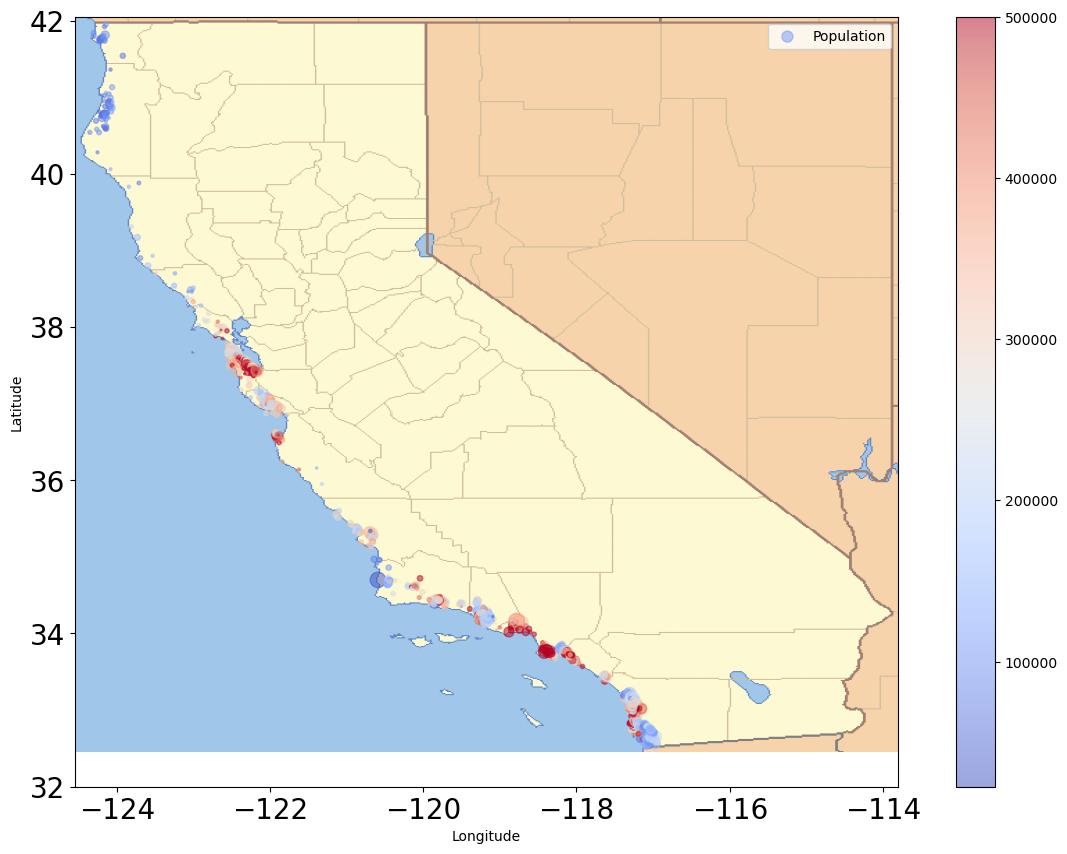

In [23]:
#Plotting only Near Ocean ditricts
df_loc=df.loc[df.ocean_proximity==prox[3]].copy()
df_loc.plot(kind='scatter',x='longitude',y='latitude', s=df_loc.population/100, label='Population',c=df_loc.median_house_value,
        alpha=0.5,sharex=False,colorbar=True,cmap='coolwarm',figsize=(15,10),fontsize=20)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05]) #to sync the image with the scale of the latitude and longitude
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.yticks(range(32,44,2))
plt.show()

## Advanced Explanatory Data Analyis with Seaborn

10. __Add__ the additional column __"income_cat"__ with the following income categories:
- lowest 25% -> "Low"
- 25th to 50th percentile -> "Below_Average"
- 50th to 75th percentile -> "Above_Average"
- 75th to 95th percentile -> "High"
- Above 95th percentile -> "Very High"

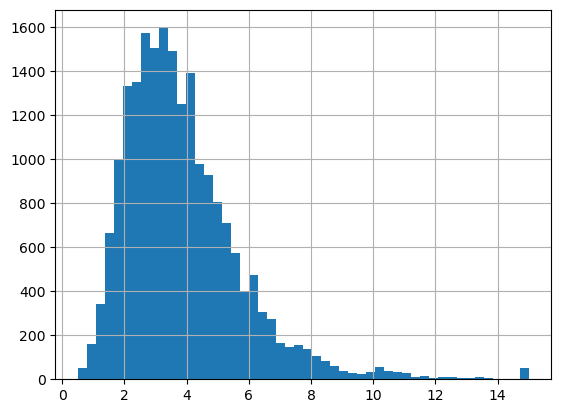

In [24]:
df.median_income.hist(bins=50)
plt.show()

In [25]:
df['income_cat']=pd.qcut(df.median_income, [0,.25,.5,.75,.95,1],labels=['low', 'below average', 'above average','high', 'very high'])
df.income_cat.value_counts(normalize=True)

low              0.250037
above average    0.250037
below average    0.249988
high             0.199922
very high        0.050017
Name: income_cat, dtype: float64

11. __Create__ (and interpret) the following Seaborn __Countplots__:

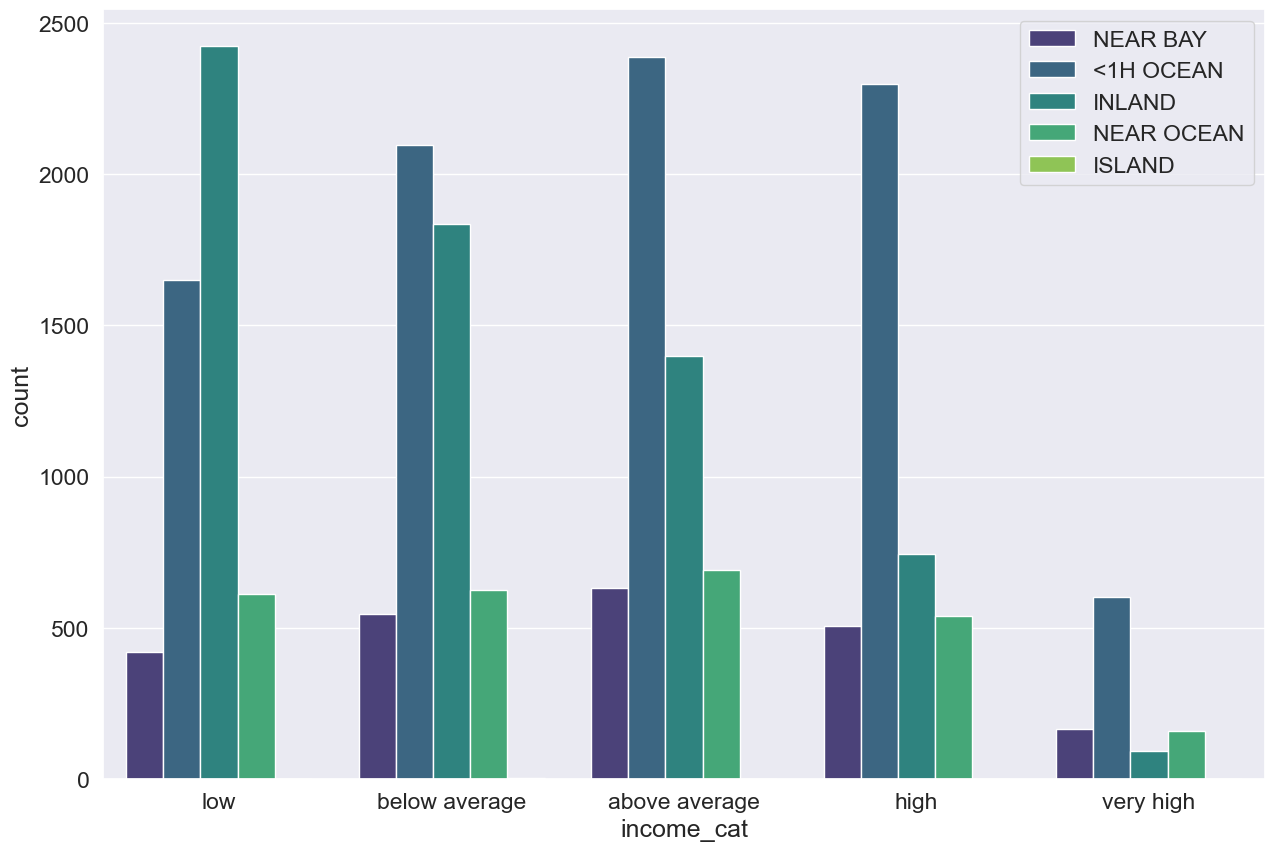

In [26]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.countplot(df, x='income_cat', hue='ocean_proximity', palette='viridis', dodge=True)
plt.legend(loc=1)
plt.show()

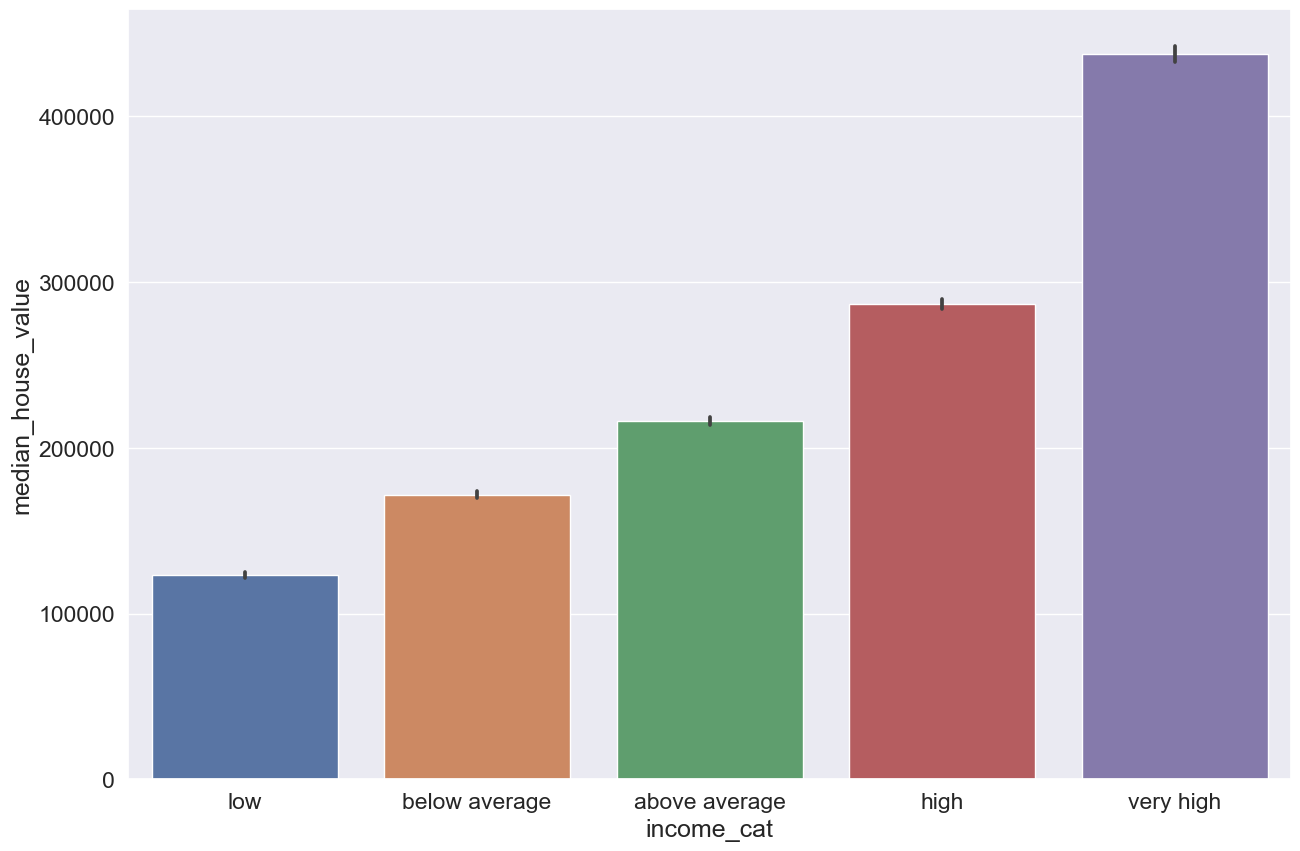

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(df,x='income_cat',y='median_house_value')
plt.show()

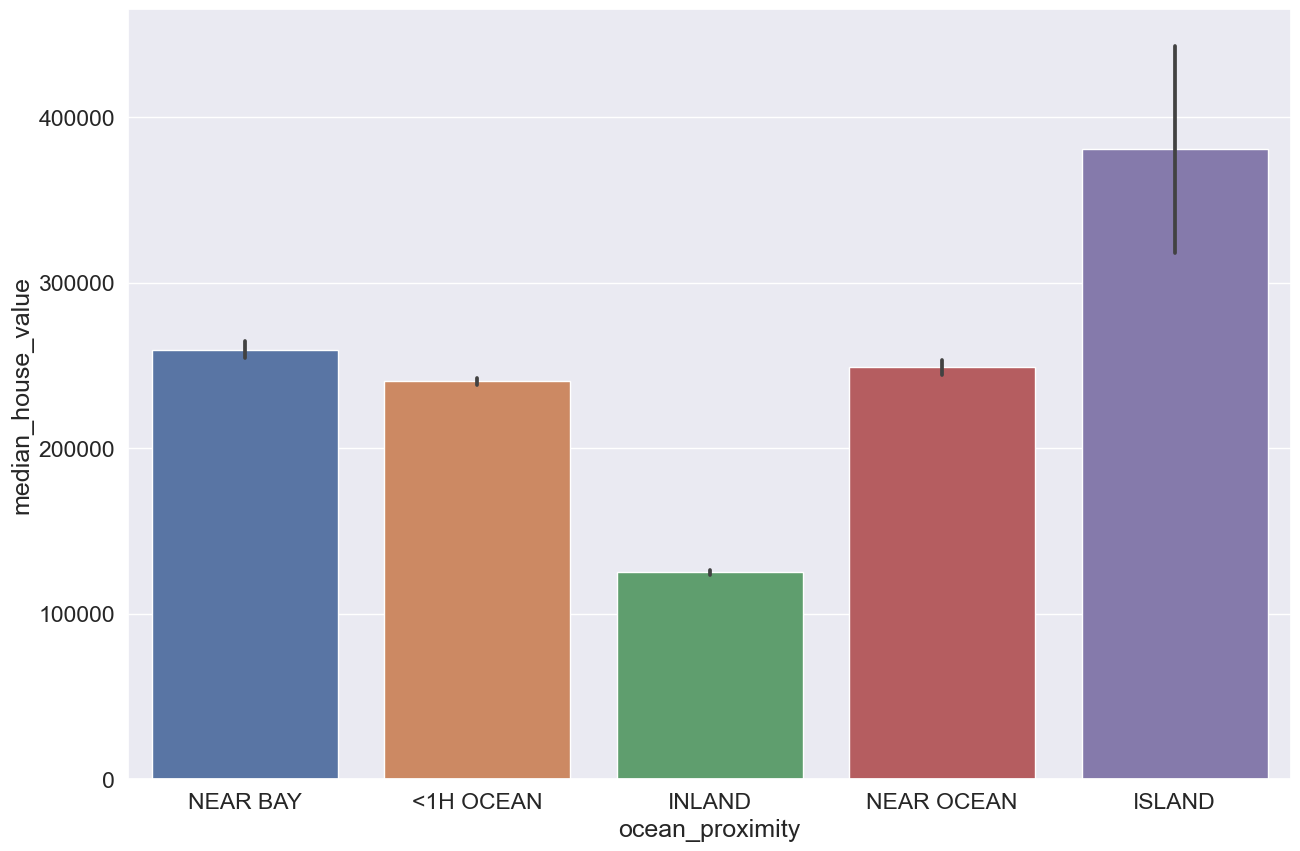

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(df,x='ocean_proximity',y='median_house_value')
plt.show()

12. __Create__ (and interpret) the following Seaborn __Heatmap__ with mean house values for all combinations of income_cat & ocean_proximity:

In [29]:
matrix=df.groupby(['income_cat','ocean_proximity']).median_house_value.mean().unstack().drop('ISLAND', axis=1)
matrix

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
low,161337.076923,84820.626650,155122.052133,148027.826514
below average,197236.013829,115124.088283,220196.177656,208665.190096
above average,232278.358759,147846.891351,261965.251582,255293.813584
high,292208.766217,208095.566622,322566.033663,337446.227778
very high,439784.235489,347571.736842,451015.078788,468739.723270


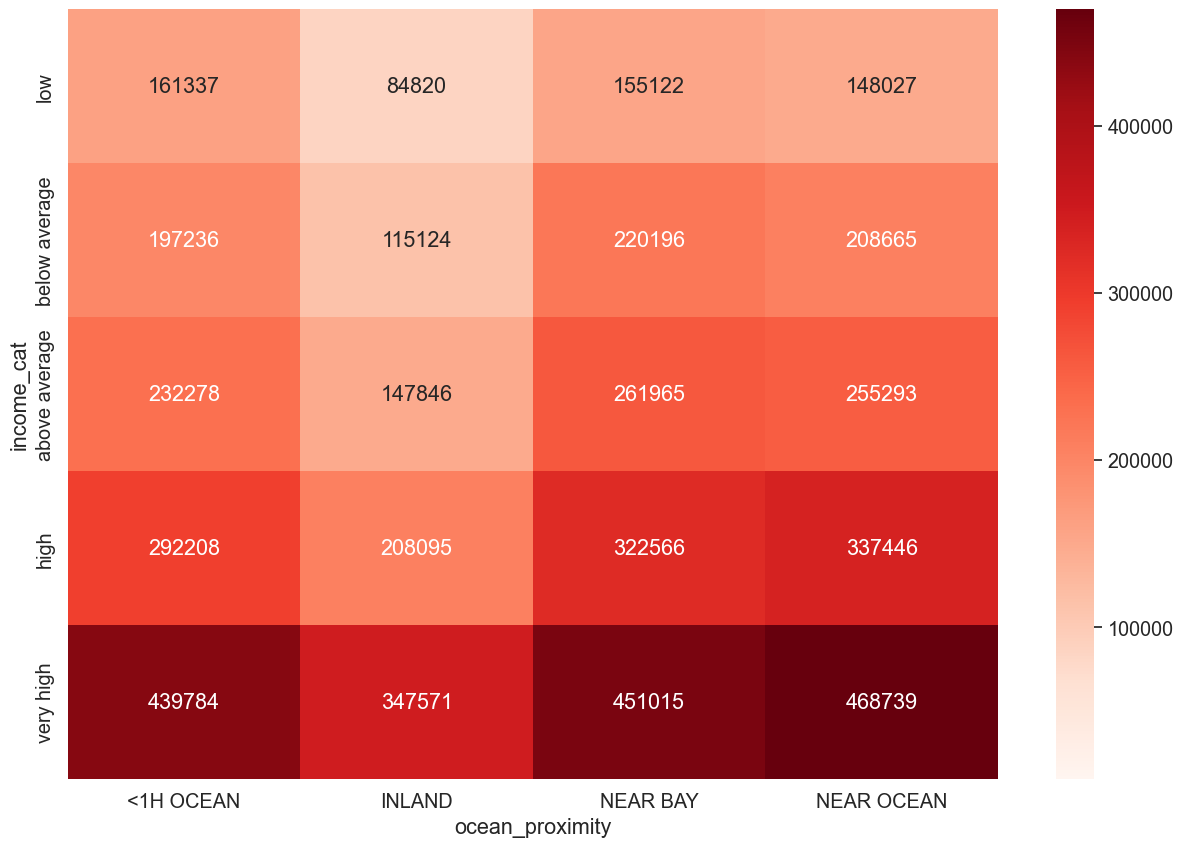

In [30]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.3)
sns.heatmap(matrix.astype(int), annot=True, fmt='d', cmap='Reds', vmin=9000, vmax=470000)
plt.show()

## Machine Learning - Predicting House Values (optional)

Based on the Explanatory Data Analysis, <br>
- select an appropriate ML Model (e.g. Linear Regression or RandomForest Regression)
- split into Train and Test Set
- prepare/engineer Features
- Fit the Model (Train Set)
- Test the Model (Test Set)

In [31]:
label=df.median_house_value.copy()
features=df.drop('median_house_value',axis=1)
label

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [32]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20433 non-null  float64 
 1   latitude                  20433 non-null  float64 
 2   housing_median_age        20433 non-null  float64 
 3   total_rooms               20433 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20433 non-null  float64 
 6   households                20433 non-null  float64 
 7   median_income             20433 non-null  float64 
 8   ocean_proximity           20433 non-null  object  
 9   rooms_per_household       20433 non-null  float64 
 10  population_per_household  20433 non-null  float64 
 11  bedrooms_per_household    20433 non-null  float64 
 12  income_cat                20433 non-null  category
dtypes: category(1), float64(11), object(1)
memory 

In [33]:
import scipy.stats as stats
feat1=features.select_dtypes('float').apply(lambda x: stats.zscore(x))
feat1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.625395,-0.049433,-0.153863
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.324942,-0.092134,-0.262936
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.150594,-0.025797,-0.049604
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.155467,-0.050162,-0.050417
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.342549,-0.085272,-0.033568
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-0.155420,-0.048949,0.076185
20636,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,0.274959,0.004912,0.459421
20637,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.090943,-0.071460,0.048373
20638,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-0.041013,-0.090853,0.157233


In [34]:
pd.options.display.float_format='{:.2f}'.format
feat1.agg(['mean','std'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


mean: 537.8705525375618 std: 421.3850700740322


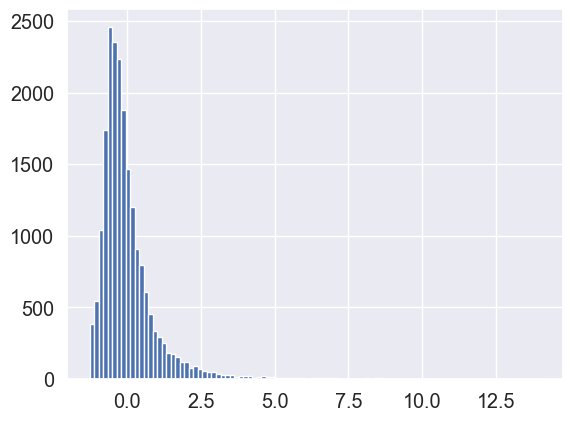

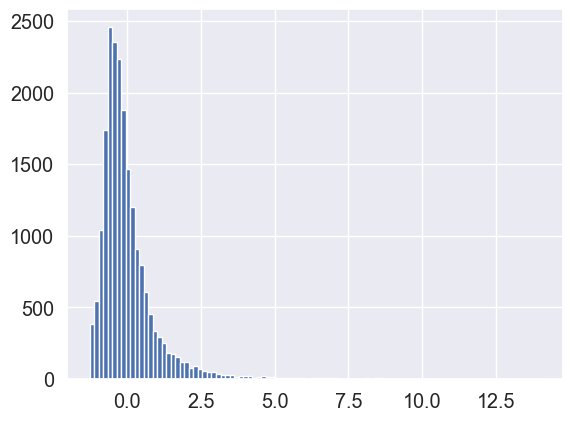

In [35]:
#The z-score of each point in a dataset is its distance to the mean of the distribution 
#Divided by the standard deviation of the data set
var_mean=df.total_bedrooms.mean()
var_std=df.total_bedrooms.std()
print('mean: '+str(var_mean)+' std: '+str(var_std))
plt.hist(feat1.total_bedrooms,bins=100)
plt.show()
plt.hist((df.total_bedrooms-var_mean)/var_std,bins=100)
plt.show()

## Feature Engineering

In [36]:
dummies=pd.get_dummies(df.ocean_proximity)
dummies 
#When used in linear models this matrix can cause colinearity problems so in those cases it's better to delete one feature as knowing the rest of them (k-1)
#is enough to have all the information because in onehot encoding there can ONLY be one 1

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [37]:
features=pd.concat([feat1,df.income_cat,dummies],axis=1)
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household,income_cat,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-0.15,very high,0,0,0,1,0
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.26,very high,0,0,0,1,0
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-0.05,high,0,0,0,1,0
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.05,high,0,0,0,1,0
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.03,above average,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.08,low,0,1,0,0,0
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.46,low,0,1,0,0,0
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.05,low,0,1,0,0,0
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.16,low,0,1,0,0,0


In [38]:
#SPLITTING THE DATA INTO TRAIN AND TEST SETS

In [47]:
X_test=features.sample(frac=0.2, random_state=123)
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household,income_cat,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14354,1.17,-1.35,-0.45,-0.10,0.27,-0.13,0.25,-0.39,-0.56,-0.09,-0.00,below average,0,0,0,0,1
12908,-0.86,1.40,-0.37,0.11,-0.03,-0.12,-0.03,-0.29,0.18,-0.04,-0.03,below average,0,1,0,0,0
19545,-0.70,0.93,0.82,-0.13,0.16,0.55,0.28,-1.14,-0.62,0.03,-0.20,low,0,1,0,0,0
12188,1.11,-0.91,-1.40,-0.64,-0.72,-0.74,-0.81,-0.40,0.42,-0.00,0.30,below average,1,0,0,0,0
14786,1.22,-1.43,-0.61,-0.41,-0.58,-0.39,-0.53,0.50,0.16,0.02,-0.23,high,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10262,0.85,-0.82,-0.69,0.61,0.01,0.41,0.11,1.43,0.77,0.04,-0.21,high,1,0,0,0,0
3614,0.58,-0.65,0.74,-0.98,-1.04,-0.90,-1.04,-0.39,-0.21,0.09,-0.18,below average,1,0,0,0,0
19296,-1.62,1.30,0.90,-0.11,-0.27,-0.33,-0.19,0.01,0.09,-0.06,-0.22,above average,1,0,0,0,0
5826,0.63,-0.68,1.86,-0.43,-0.62,-0.60,-0.62,0.49,0.43,-0.02,-0.08,high,1,0,0,0,0


In [48]:
X_test.income_cat.value_counts(normalize=True) #To check if the random sammple is well stratified (have the same ratio between categories of a variable)

above average   0.25
below average   0.25
low             0.25
high            0.20
very high       0.05
Name: income_cat, dtype: float64

In [ ]:
#Get the features train set

In [55]:
X_train=features.loc[~features.index.isin(X_test.index)].copy()
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household,income_cat,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-0.15,very high,0,0,0,1,0
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.26,very high,0,0,0,1,0
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-0.05,high,0,0,0,1,0
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.05,high,0,0,0,1,0
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.03,above average,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.08,low,0,1,0,0,0
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.46,low,0,1,0,0,0
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.05,low,0,1,0,0,0
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.16,low,0,1,0,0,0


In [57]:
#X_test set was picked randomly and also sorted randomly when the sample() method was used, but the X_train is not shuffled, we will sort it randomly using sample()
X_train=X_train.sample(frac=1, random_state=123)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household,income_cat,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3863,0.56,-0.69,-0.53,1.07,1.95,0.72,1.88,-0.08,-0.54,-0.12,0.03,above average,1,0,0,0,0
19813,0.16,0.46,0.35,-0.95,-1.06,-0.98,-1.01,-0.70,-0.19,-0.03,-0.63,low,0,1,0,0,0
11079,0.86,-0.85,-0.21,1.34,1.16,1.04,1.28,0.08,0.08,-0.04,-0.13,above average,1,0,0,0,0
2116,-0.07,0.52,-1.40,1.00,1.08,0.68,1.02,-0.64,0.00,-0.06,0.04,below average,0,1,0,0,0
7904,0.75,-0.83,-1.00,1.01,0.45,0.97,0.54,1.13,0.59,0.05,-0.14,high,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9319,-1.48,1.09,1.86,-1.11,-0.99,-1.06,-0.96,-1.03,-1.56,-0.13,-0.41,low,0,0,0,1,0
9489,-1.80,1.68,-0.84,-1.10,-1.15,-1.16,-1.17,-0.92,-0.38,-0.09,-0.16,low,1,0,0,0,0
13302,0.97,-0.73,-1.08,0.65,0.65,1.29,0.61,-0.25,0.04,0.08,0.02,below average,0,1,0,0,0
18854,-1.44,2.64,-1.08,0.05,-0.08,-0.21,-0.14,-0.22,0.29,-0.04,0.07,below average,0,1,0,0,0


In [58]:
#Finally we get rid of the columns that are not hwlpful for the machine learning models
X_train.drop('income_cat', inplace=True, axis=1)
X_test.drop('income_cat', inplace=True, axis=1)

In [59]:
#Get the train and test sets for the label (the target, the dependent variable)
y_train=label.loc[X_train.index]
y_test=label.loc[X_test.index]
y_train

3863    272600.00
19813   118800.00
11079   244900.00
2116     74700.00
7904    437400.00
           ...   
9319    200000.00
9489    175000.00
13302   127000.00
18854   128800.00
17399   109400.00
Name: median_house_value, Length: 16346, dtype: float64

In [60]:
# Regression model using random forest

In [122]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor(random_state=42, n_estimators=500, max_features='sqrt', max_depth=75, min_samples_split=2)


In [123]:
forest_reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [124]:
forest_reg.score(X_train,y_train)

0.9759908074504584

In [125]:
from sklearn.metrics import mean_squared_error

In [126]:
pred=forest_reg.predict(X_train)

In [127]:
forest_mse=mean_squared_error(y_train,pred)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

17969.966470158135

In [128]:
#Applying the regressor to the test set

In [129]:
forest_reg.score(X_test,y_test)

0.825129365477786

In [130]:
pred=forest_reg.predict(X_test)
pred

array([220051.404, 126470.2  ,  69470.2  , ..., 218706.004, 323503.622,
       261322.6  ])

In [131]:
pred_mse=mean_squared_error(y_test,pred)
pred_rmse=np.sqrt(pred_mse)
pred_rmse

47351.48513721707

count   4087.00
mean       1.07
std        0.35
min        0.28
25%        0.93
50%        1.04
75%        1.17
max       12.80
Name: median_house_value, dtype: float64


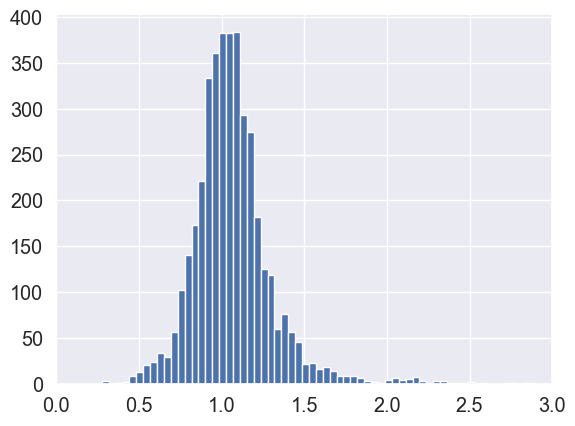

In [140]:
#The closer to 1, the better
c=(pred/y_test)
print(c.describe())
c.hist(bins=300)
plt.xlim(0,3)
#plt.xticks(np.arange(0.5,1.75,.15),)
plt.show()

In [143]:
#Feature importances tells how much each variable (feature) affects the predicted result
forest_reg.feature_importances_

array([9.00992573e-02, 8.31004206e-02, 4.11742793e-02, 2.57885878e-02,
       2.06191270e-02, 2.42935400e-02, 1.99742096e-02, 3.08514438e-01,
       9.10221265e-02, 9.68298151e-02, 2.86573978e-02, 2.18130008e-02,
       1.32637891e-01, 2.13716333e-04, 5.99754949e-03, 9.26464282e-03])

In [163]:
feature_imp=pd.Series(forest_reg.feature_importances_, index=X_train.columns).sort_values()
feature_imp

ISLAND                     0.00
NEAR BAY                   0.01
NEAR OCEAN                 0.01
households                 0.02
total_bedrooms             0.02
<1H OCEAN                  0.02
population                 0.02
total_rooms                0.03
bedrooms_per_household     0.03
housing_median_age         0.04
latitude                   0.08
longitude                  0.09
rooms_per_household        0.09
population_per_household   0.10
INLAND                     0.13
median_income              0.31
dtype: float64

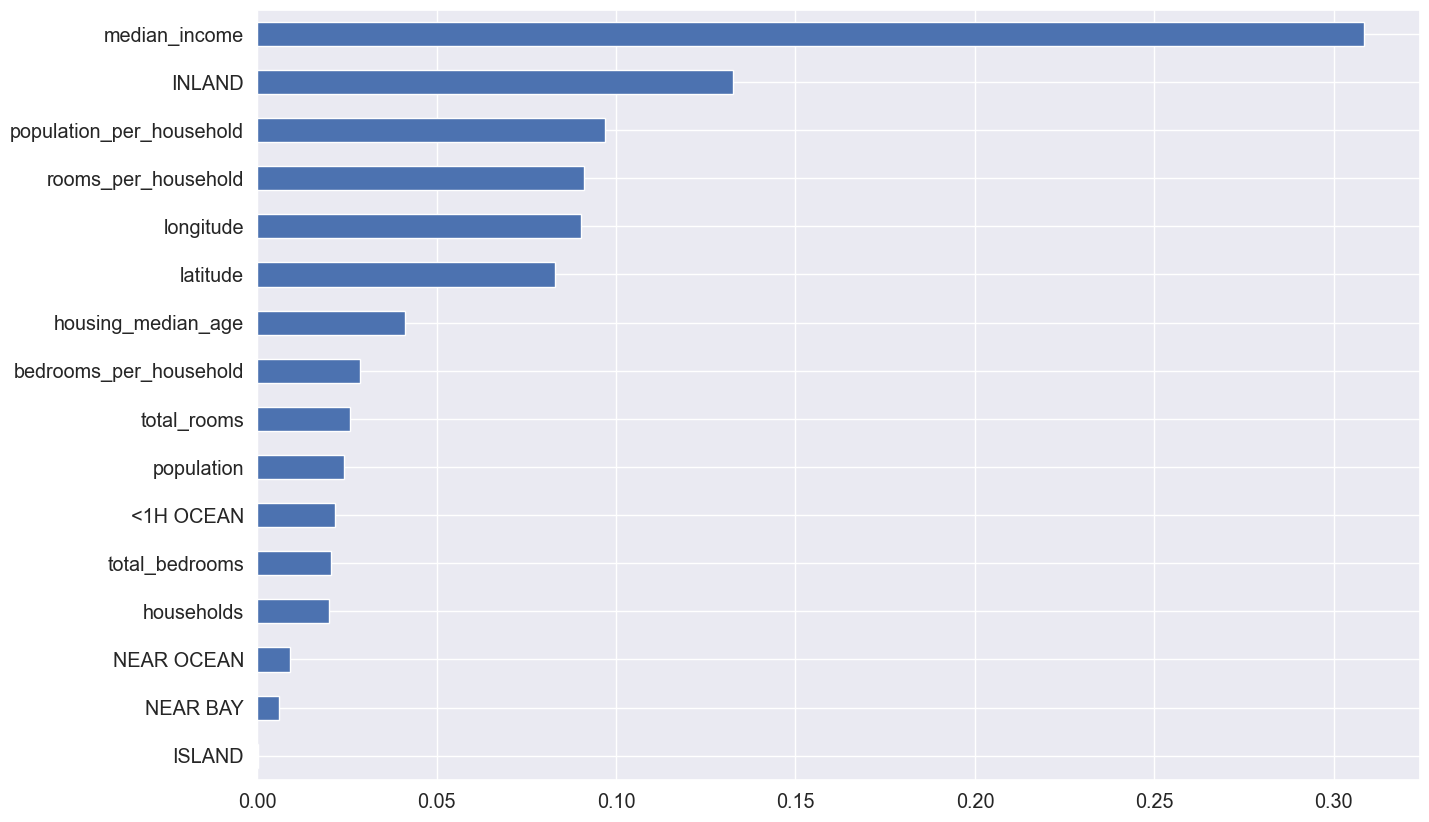

In [161]:
plt.figure(figsize=(15,10))
feature_imp.plot(kind='barh')
plt.show()